Part 1: Data Preparation and Exploration

1.Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

2.Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
                                           
3.Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

In [1]:
import pandas as pd

data = pd.read_csv('exchange_rate.csv', parse_dates=['date'], dayfirst=True)
data.set_index('date', inplace=True)

print(data.head())

            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7818
1990-01-03   0.7867
1990-01-04   0.7860
1990-01-05   0.7849


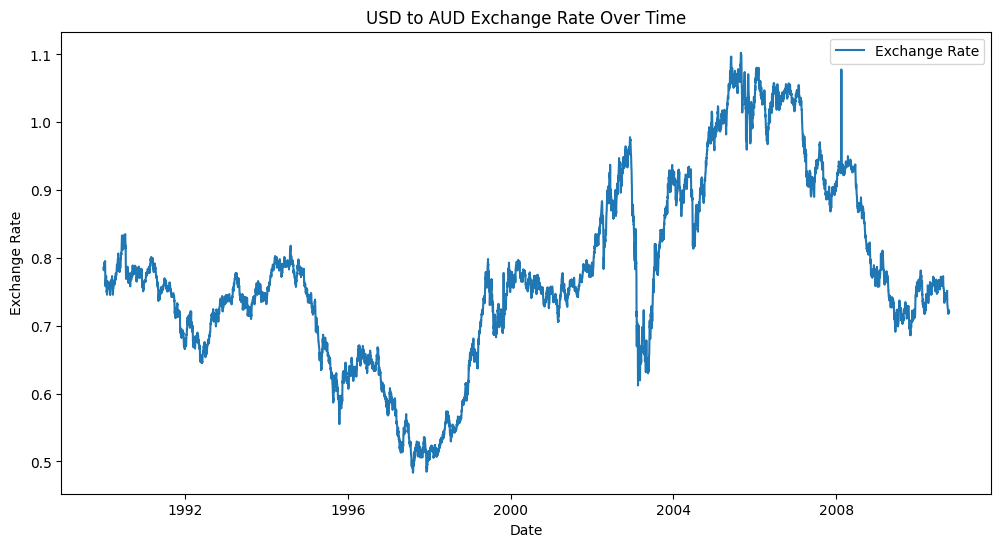

In [2]:
import matplotlib.pyplot as plt

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(data, label='Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [3]:
#checking for missing values
missing_values = data.isnull().sum()
print(f"Missing values: {missing_values}")

Missing values: Ex_rate    0
dtype: int64


Part 2: Model Building - ARIMA

1.Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

2.Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

3.Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

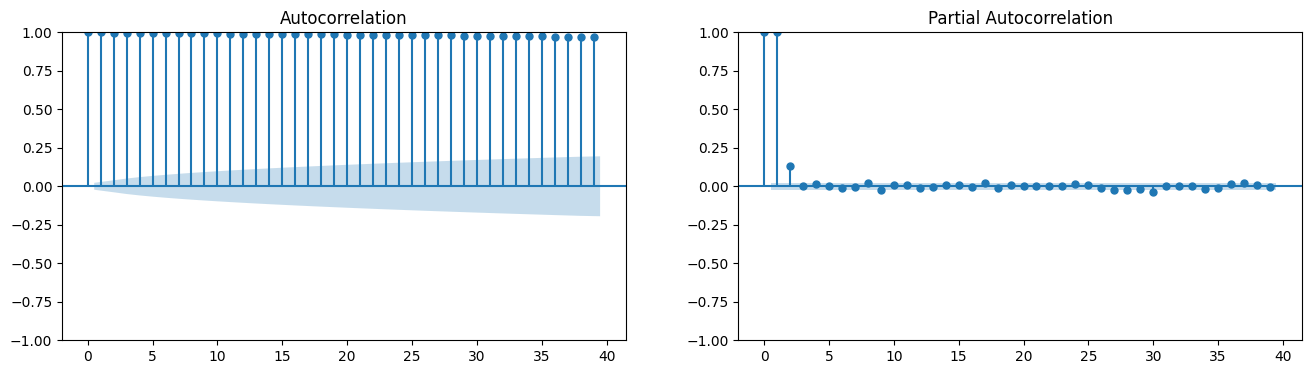

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#plottinf ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(data, ax=axes[0])
plot_pacf(data, ax=axes[1])
plt.show()


In [5]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADFuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print("critical value" , result[4])

    return result[1]

# Check stationarity
p_value = adf_test(data['Ex_rate'])
if p_value > 0.05:
    print("Series is not stationary, differencing required")
    data_diff = data.diff().dropna()
    p_value_diff = adf_test(data_diff['Ex_rate'])
    if p_value_diff <= 0.05:
        data = data_diff
else:
    print("Series is stationary")

ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477
critical value {'1%': np.float64(-3.4312123140180137), '5%': np.float64(-2.861921078147796), '10%': np.float64(-2.5669728434336108)}
Series is not stationary, differencing required
ADF Statistic: -99.39343120118632
p-value: 0.0
critical value {'1%': np.float64(-3.4312123140180137), '5%': np.float64(-2.861921078147796), '10%': np.float64(-2.5669728434336108)}


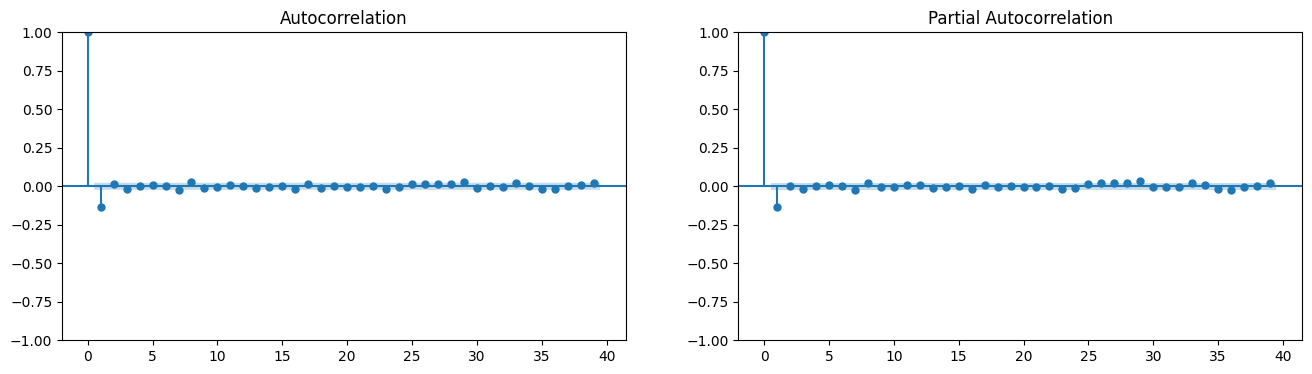

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(data, ax=axes[0])
plot_pacf(data, ax=axes[1])
plt.show()


In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Initial parameters based on ACF and PACF plots
p = 2  # Autoregressive term
d = 0  # Differencing term
q = 3  # Moving average term

# Fit the ARIMA model
arima_model = ARIMA(data, order=(p, d, q))
arima_result = arima_model.fit()

print(arima_result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7587
Model:                 ARIMA(2, 0, 3)   Log Likelihood               28058.590
Date:                Wed, 17 Sep 2025   AIC                         -56103.179
Time:                        03:22:51   BIC                         -56054.640
Sample:                    01-02-1990   HQIC                        -56086.521
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.134e-05   6.33e-05     -0.179      0.858      -0.000       0.000
ar.L1         -0.6386      0.144     -4.436      0.000      -0.921      -0.356
ar.L2         -0.7645      0.137     -5.562      0.0

Text(0.5, 1.0, 'Autocorrelation function of residuals')

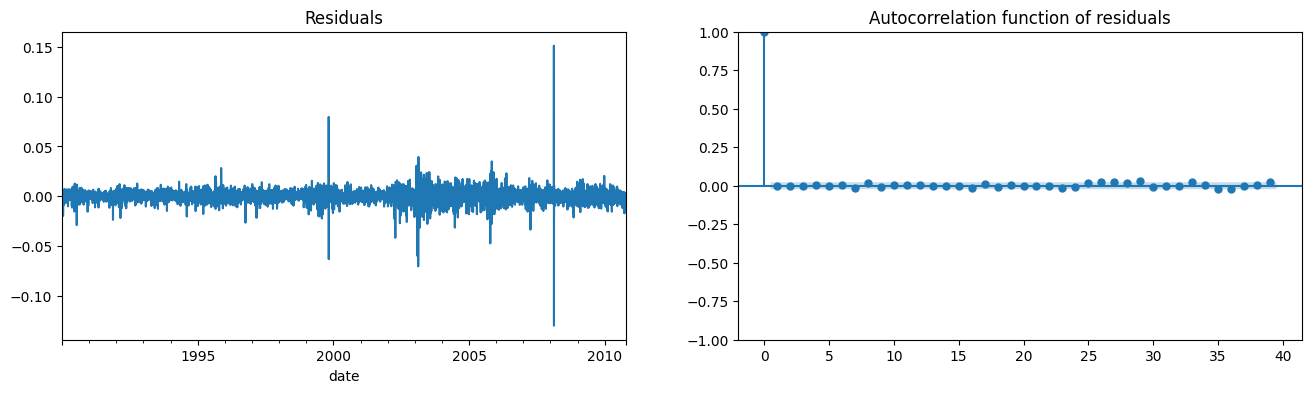

In [8]:
#residuals

residuals = arima_result.resid
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
residuals.plot()
plt.title('Residuals')

#Acf
plt.subplot(1, 2, 2)
plot_acf(residuals, ax=plt.gca())
plt.title('Autocorrelation function of residuals')

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


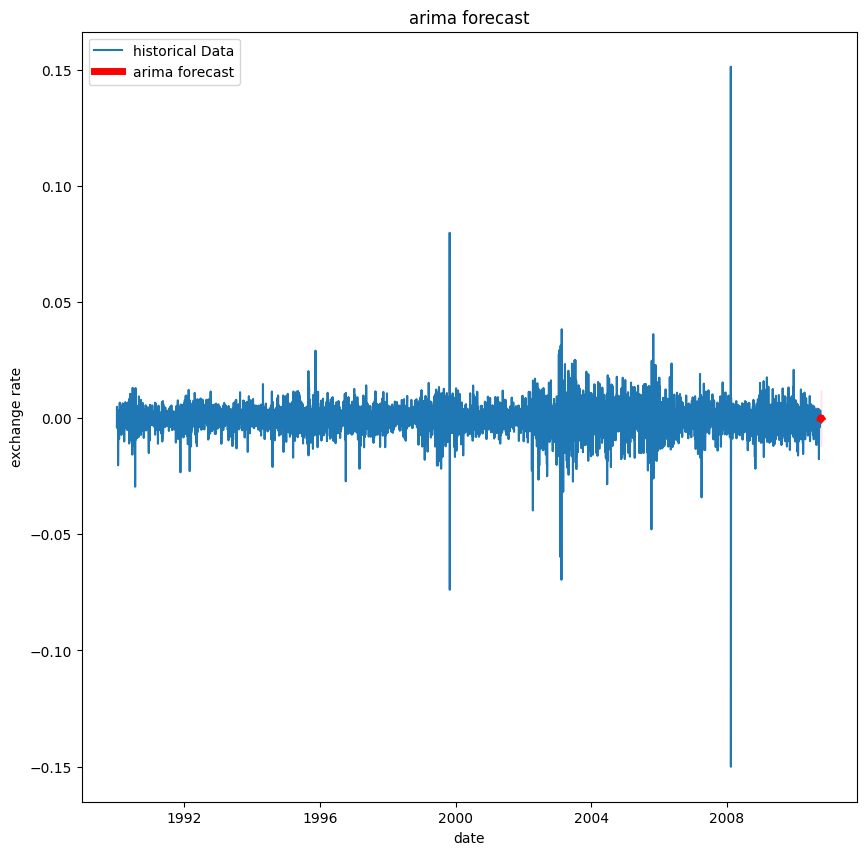

In [9]:
# Fit the arima model
arima_model = ARIMA(data, order=(2, 0, 3))
arima_result = arima_model.fit()

# forecasting future values
forecast_steps = 10
arima_forecast = arima_result.get_forecast(steps=forecast_steps)
arima_forecast_mean = arima_forecast.predicted_mean
arima_forecast_conf_int = arima_forecast.conf_int()
arima_forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot arima forecasted values
plt.figure(figsize=(10, 10))
plt.plot(data, label='historical Data')
plt.plot(arima_forecast_mean, label='arima forecast', color='red' , lw =5)
plt.fill_between(arima_forecast_index,
                 arima_forecast_conf_int.iloc[:, 0],
                 arima_forecast_conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('arima forecast')
plt.xlabel('date')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

In [10]:
arima_forecast_conf_int.iloc[:, 0],
# arima_forecast_conf_int.iloc[:, 1]

(2010-10-11   -0.011814
 2010-10-12   -0.011781
 2010-10-13   -0.011817
 2010-10-14   -0.011931
 2010-10-15   -0.011833
 2010-10-16   -0.011811
 2010-10-17   -0.011901
 2010-10-18   -0.011862
 2010-10-19   -0.011819
 2010-10-20   -0.011877
 Freq: D, Name: lower Ex_rate, dtype: float64,)

In [11]:
arima_forecast_mean

,predicted_mean
2010-10-11,-0.000075
2010-10-12,0.000059
2010-10-13,0.000024
2010-10-14,-0.000088
2010-10-15,0.000010
2010-10-16,0.000033
2010-10-17,-0.000056
2010-10-18,-0.000017
2010-10-19,0.000026
2010-10-20,-0.000031


Part 4: Evaluation and Comparison

1.Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

2.Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

3.Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

# 1. Compute Error Metrics




In [12]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

actual_values = data[-forecast_steps:]

# Calculating error metrics for ARIMA
arima_mae = mean_absolute_error(actual_values, arima_forecast_mean)
arima_rmse = np.sqrt(mean_squared_error(actual_values, arima_forecast_mean))
print(f"mean absolute error: {arima_mae}, rootmse: {arima_rmse}")


mean absolute error: 0.0014520126302415939, rootmse: 0.0019449240995491348


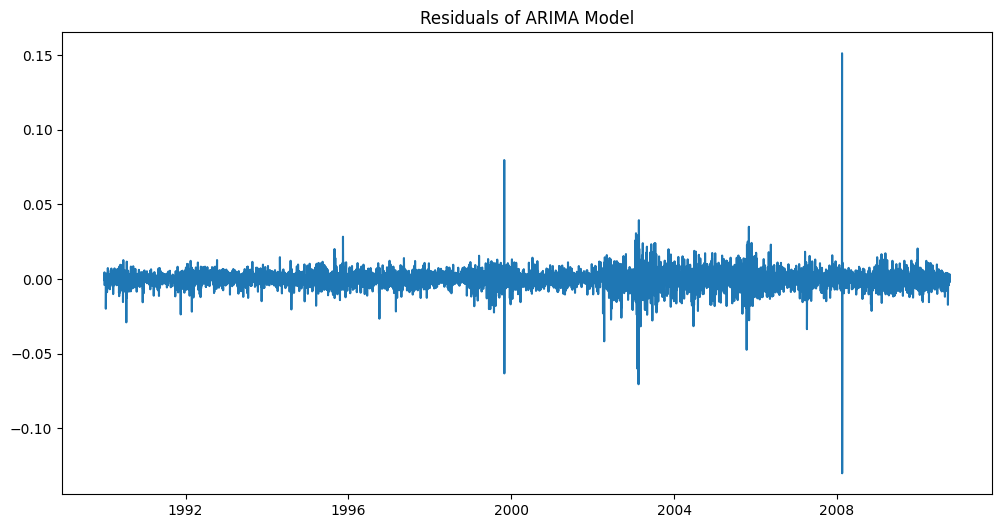

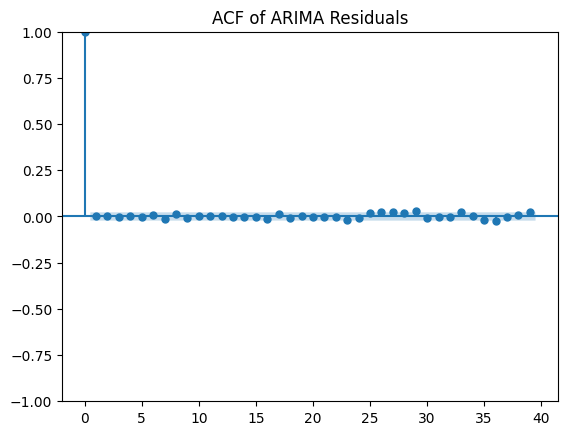

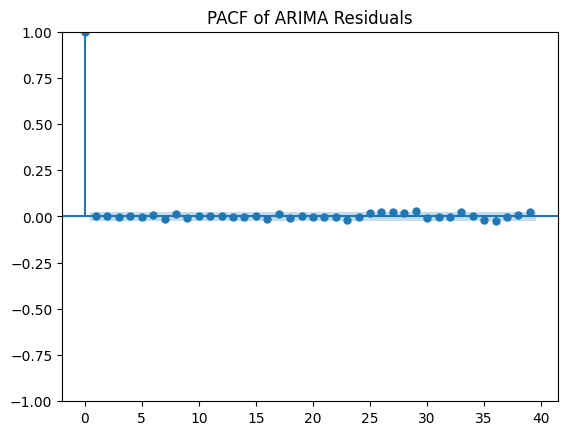

In [13]:
# residual Analysis for ARIMA
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(residuals)
plt.title('ACF of ARIMA Residuals')
plt.show()

plot_pacf(residuals)
plt.title('PACF of ARIMA Residuals')
plt.show()


# 2.Model Comparision

Based on the computed error metrics:

*   **Mean Absolute Error (MAE)** for the ARIMA model is {{arima_mae}}.
*   **Root Mean Squared Error (RMSE)** for the ARIMA model is {{arima_rmse}}.

These metrics indicate the average magnitude of errors in the ARIMA model's predictions.

**Advantages of ARIMA:**

*   ARIMA is a relatively simple yet powerful model for time series forecasting.
*   It can capture various patterns in time series data, including trends, seasonality, and cycles.
*   The model provides insights into the underlying structure of the time series through its parameters (p, d, q).

**Limitations of ARIMA:**

*   ARIMA assumes that the time series is stationary, which often requires differencing the data.
*   Selecting the appropriate order (p, d, q) can be challenging and requires careful analysis of ACF and PACF plots.
*   ARIMA models may not perform well on highly volatile or non-linear time series data.

In this case, the ARIMA model was fitted to the differenced data to achieve stationarity. The residual analysis suggests that the model captures most of the patterns in the differenced series, as the residuals appear to be close to white noise. However, the Jarque-Bera test on the residuals indicates that they are not normally distributed, which is a limitation of this model fit.




Based on the analysis and evaluation of the ARIMA model for forecasting the USD to AUD exchange rate:

*   The initial exploration revealed the non-stationary nature of the exchange rate time series, necessitating differencing.
*   The ACF and PACF plots of the differenced data guided the selection of the ARIMA(2, 0, 3) model parameters.
*   The fitted ARIMA model provided a reasonable fit to the differenced data, as indicated by the model summary and residual plots. The residuals appear to be largely uncorrelated, suggesting that the model has captured the linear dependencies in the data.
*   However, the Jarque-Bera test on the residuals indicated a departure from normality, suggesting that while the model captures the autocorrelation structure, there might be other patterns or characteristics in the residuals not accounted for by the ARIMA model (e.g., heteroscedasticity or non-linear dependencies).
*   The out-of-sample forecast shows the model's predictions along with a confidence interval, providing a range of likely future values. The error metrics (MAE and RMSE) quantify the average magnitude of the forecasting errors.

# 3.Conclusion:

The ARIMA(2, 0, 3) model, applied to the differenced exchange rate data, provides a basic framework for forecasting. While it effectively addresses the non-stationarity and captures the linear dependencies, the non-normal residuals suggest that there might be room for improvement. For real-world applications, further investigation into more complex models (e.g., SARIMA to account for potential seasonality, or models that handle non-normality and heteroscedasticity) or incorporating external factors might lead to more accurate forecasts and better understanding of the exchange rate dynamics. Comparing the ARIMA model's performance with other time series models would also be crucial to determine the most suitable approach for this specific dataset.